# Current Businesses Data

### Read-in the current business info (from SD data portal)
### Look at only business in the city of San Diego
### Count the number of businesses and number of unique NAICS codes
### Strip whitespace from addresses and test looking up a given business by address
### Add a column for simplified NAICS codes (i.e., just the first 2 digits) and count the number of unique simplified codes
### Look at full and simplified NAICS codes for all Starbucks locations (as a case study)
### Make histograms of all NAICS codes, all simplified NAICS codes, creation year, and business start year
### Calculate number of days business has been open through beginning of Insight (2016-09-06)
### Try to get census tract for all businesses
### Output each found business and their account_key, doing_bus_as_name, naics_code, simplified, days_since_creation, naics_code_simple, and census_tract to data_final/sd_active_businesses_cleaned.csv
### For all businesses where I couldn't get a census tract, output same info as above (but replace census_tract with address_str) to data/sd_bad_business_addresses.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read in business info
bus = pd.read_csv('data/sd_active_businesses.csv')
# use on SD businesses
bus = bus[(bus.city=='SAN DIEGO')]
# count how many businesses we got
bus.account_key.count()

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


56888

In [4]:
code_counts = bus.naics_code.value_counts()
print 'Number of unique NAICS code: '+str(code_counts.count())

Number of unique NAICS code: 1074


In [5]:
# strip whitespace from address
bus.address_str = bus.address_str.map(lambda x: x.strip())
# print a business name given an address
print bus.loc[bus.address_str=="930 S 47TH ST"].doing_bus_as_name.to_string(index=False)

U-STOR-IT 805 LLC


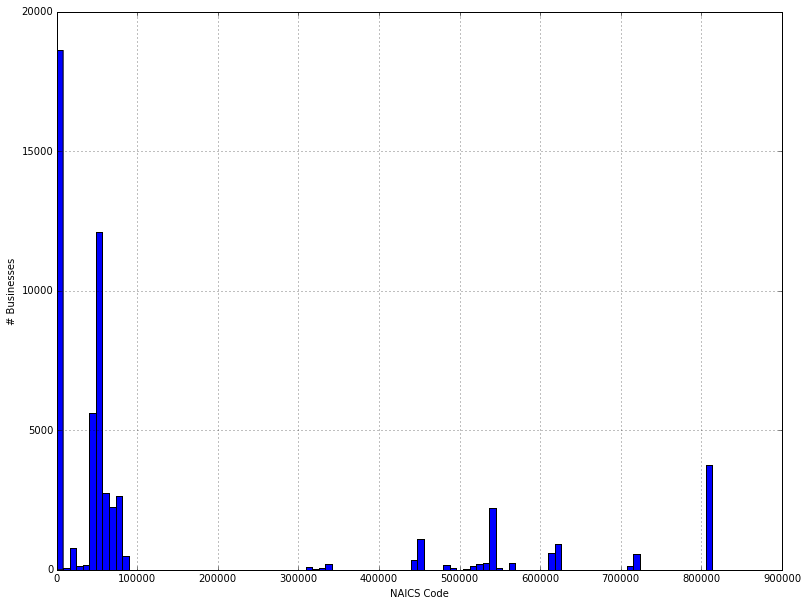

In [6]:
# make a histogram of NAICS codes
plt.figure(figsize=(13, 10))
bus.naics_code.hist(bins=100)#bins=code_counts.count())
plt.xlabel('NAICS Code')
plt.ylabel('# Businesses')

In [7]:
# hack the duplicated descriptions
spot = bus[bus.account_key==2015032254].index[0]
#print spot
bus.ix[spot, 'naics_code'] = 7224
#print bus.loc[spot]
spot = bus[(bus['naics_code']==72241) & (bus['doing_bus_as_name'].str.contains('STARBUCKS'))]
#print spot.account_key
spot = bus[bus.account_key==2001000767].index[0]
#print spot
bus.ix[spot, 'naics_code'] = 7224
#print bus.loc[spot]
# look at all Starbucks businesses in SD
cut = bus.doing_bus_as_name.str.contains('STARBUCKS')
print "number of Starbucks: "+str(np.sum(cut))
print "number of unique NAICS codes for Starbucks: "+str(bus.naics_code[cut].value_counts().count())
print
codes = bus.naics_code[cut].value_counts().index.tolist()
descriptions = bus.naics_description[cut].value_counts().index.tolist()
counts = bus.naics_description[cut].value_counts().tolist()
starbucks = pd.DataFrame({'# Stores':counts,'NAICS Code':codes,'NAICS Description':descriptions})
starbucks

number of Starbucks: 87
number of unique NAICS codes for Starbucks: 18



,# Stores,NAICS Code,NAICS Description
0,31,722,FOOD SERVICES & DRINKING PLACES
1,27,722213,SNACK & NONALCOHOLIC BEVERAGE BARS
2,6,7224,DRINKING PLACES (ALCOHOLIC BEVERAGES)
3,4,4452,SPECIALTY FOOD STORES
4,3,445299,OTHER MISCELLANEOUS STORE RETAILERS
5,3,4539,ALL OTHER SPECIALTY FOOD STORES
6,2,7223,SPECIAL FOOD SERVICES
7,1,45299,OTHER SPECIALTY FOOD STORES
8,1,44,ALL OTHER GENERAL MERCHANDISE STORES
9,1,7221,GENERAL MERCHANDISE STORES


In [8]:
# insert a new column for "simplified" NAICS code
bus.insert(len(bus.columns),'naics_code_simple',bus.naics_code.values)

In [9]:
# grab only the first 2 digits of each NAICS code to simplify things
cut = bus.naics_code_simple>=100000
bus.naics_code_simple[cut]=bus.naics_code[cut]//10000
cut = bus.naics_code_simple>=10000
bus.naics_code_simple[cut]=bus.naics_code[cut]//1000
cut = bus.naics_code_simple>=1000
bus.naics_code_simple[cut]=bus.naics_code[cut]//100
cut = bus.naics_code_simple>=100
bus.naics_code_simple[cut]=bus.naics_code[cut]//10
bus

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,account_key,doing_bus_as_name,business_owner_name,ownership_type,address_str,apt_suite,city,state,zip,pmb_box,po_box,business_phone,creation_dt,bus_start_dt,cert_expiration_dt,naics_code,naics_description,naics_code_simple
0,2016008533,ARCHITECT ATHLETICS,DANNY WESLEY HERNANDEZ,SOLE,6371 RHOADES CT,NaN,SAN DIEGO,CA,92139-2323,NaN,NaN,(619) 402-7495,2016-07-07,2016-07-07,2017-07-31,42199,OTHER MISCELLANEOUS DURABLE GOODS WHSLE,42
1,2016008531,SILVER LINING STAGERS,LAUREL HAMBUCH & JONINA PALMER-MAJOR,PARTNR,8564 CELTIC CT,NaN,SAN DIEGO,CA,92129-4209,NaN,NaN,(858) 337-1306,2016-07-07,2016-08-01,2017-07-31,54149,OTHER SPECIALIZED DESIGN SERVICES,54
2,2016008529,TAMKEEN INC,TAMKEEN INC,CORP,7710 BALBOA AVE,213,SAN DIEGO,CA,92111-2251,NaN,NaN,(619) 741-1160,2016-07-07,2016-07-01,2017-06-30,42299,OTHER MISCELLANEOUS NONDURABLE GOODS WHSLE,42
4,2016008525,REBECCA EICHTEN ART DESIGN,REBECCA EICHTEN,SOLE,3956 FLORIDA ST,1,SAN DIEGO,CA,92104-2785,NaN,NaN,(858) 922-3915,2016-07-07,2016-01-15,2017-01-31,45311,FLORISTS,45
5,2016008524,COLD STONE CREAMERY 20837,KAHALA HOLDINGS LLC,LLC,4603 MISSION BLVD,102,SAN DIEGO,CA,92109-2793,NaN,NaN,(858) 272-5200,2016-07-07,2016-06-29,2017-06-30,72221,LIMITED-SERVICE EATING PLACES,72
6,2016008523,MOVEMENT MORTGAGE,MOVEMENT MORTGAGE LLC,LLC,7050 FRIARS RD,100,SAN DIEGO,CA,92108-1136,NaN,NaN,(757) 452-3140,2016-07-07,2016-05-23,2017-05-31,52599,OTHER FINANCIAL VEHICLES,52
7,2016008520,ASHLEY DUCHENE PHOTOGRAPHY,ASHLEY DUCHENE,SOLE,670 GAGE DR,NaN,SAN DIEGO,CA,92106-3230,NaN,NaN,(619) 246-4212,2016-07-07,2012-01-01,2016-12-31,54192,PHOTOGRAPHIC SERVICES,54
8,2016008519,MOVEMENT MORTGAGE LLC,MOVEMENT MORTGAGE LLC,LLC,11440 W BERNARDO CENTER DR,317,SAN DIEGO,CA,92128,NaN,NaN,(757) 452-3140,2016-07-07,2016-06-28,2017-06-30,52599,OTHER FINANCIAL VEHICLES,52
10,2016008517,GLOBAL LIMO SERVICE LLC,GLOBAL LIMO SERVICE LLC,LLC,4587 WINONA AVE,5,SAN DIEGO,CA,92115-3339,NaN,NaN,(619) 315-3035,2016-07-07,2016-07-07,2017-07-31,4853,TAXI & LIMOUSINE SERVICE,48
11,2016008516,STEPHANIE SULLIVAN,STPHANIE SULLIVAN,SOLE,10130 WATERIDGE CIR,116,SAN DIEGO,CA,92121-5767,NaN,NaN,(858) 232-8482,2016-07-07,2014-01-01,2016-12-31,81,OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION),81


In [10]:
# count number of simplified NAICS codes
code_counts = bus.naics_code_simple.value_counts()
print 'Number of unique simplified NAICS code: '+str(code_counts.count())
print code_counts

Number of unique simplified NAICS code: 24
54    13489
81     8715
45     4441
62     4268
56     3795
44     3420
72     3124
53     3035
42     2025
23     1997
48     1784
61     1535
71     1409
52     1207
51      760
33      750
32      304
31      247
49      231
55      227
11       78
22       38
92        7
21        2
Name: naics_code_simple, dtype: int64


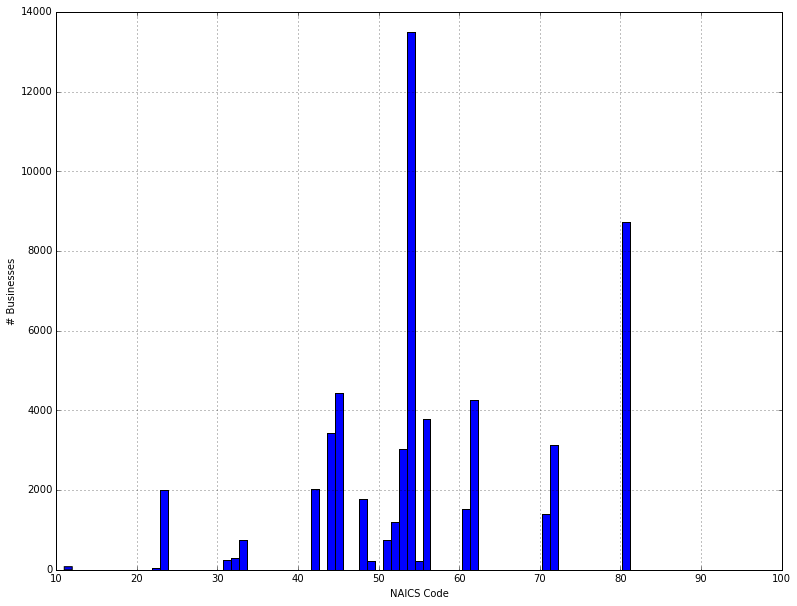

In [11]:
# make a histogram of simplified NAICS codes
plt.figure(figsize=(13, 10))
diff = max(bus.naics_code_simple)-min(bus.naics_code_simple)
bus.naics_code_simple.hist(bins=diff+1)
plt.xlabel('NAICS Code')
plt.ylabel('# Businesses')

In [12]:
# look at all Starbucks businesses in SD
cut = bus.doing_bus_as_name.str.contains('STARBUCKS')
print "number of Starbucks: "+str(np.sum(cut))
print "number of unique simplified NAICS codes for Starbucks: "+str(bus.naics_code_simple[cut].value_counts().count())
print
print bus.naics_code_simple[cut].value_counts()

number of Starbucks: 87
number of unique simplified NAICS codes for Starbucks: 4

72    69
44    11
45     6
56     1
Name: naics_code_simple, dtype: int64


In [13]:
bus.creation_dt = bus.creation_dt.astype("datetime64")
bus.bus_start_dt = bus.bus_start_dt.astype("datetime64")

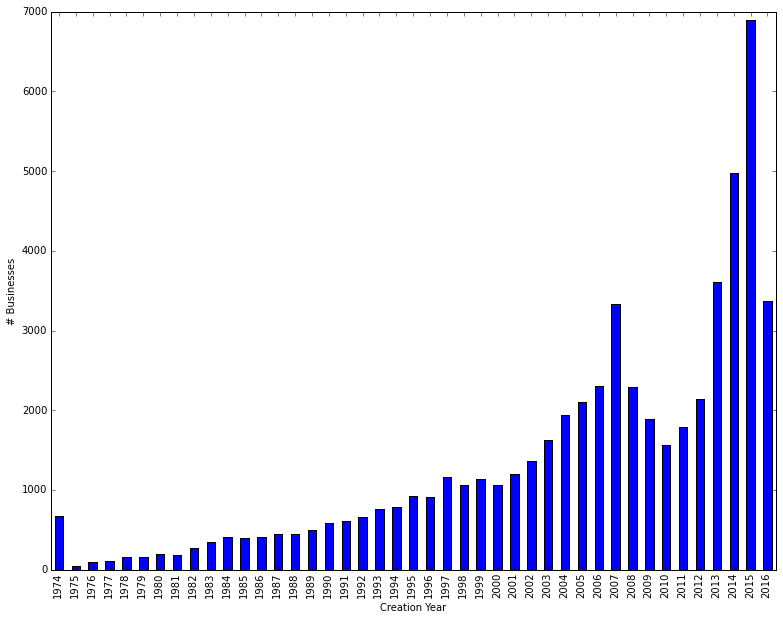

In [14]:
plt.figure(figsize=(13, 10))
bus.creation_dt.groupby(bus.creation_dt.dt.year).count().plot(kind="bar")
plt.xlabel('Creation Year')
plt.ylabel('# Businesses')

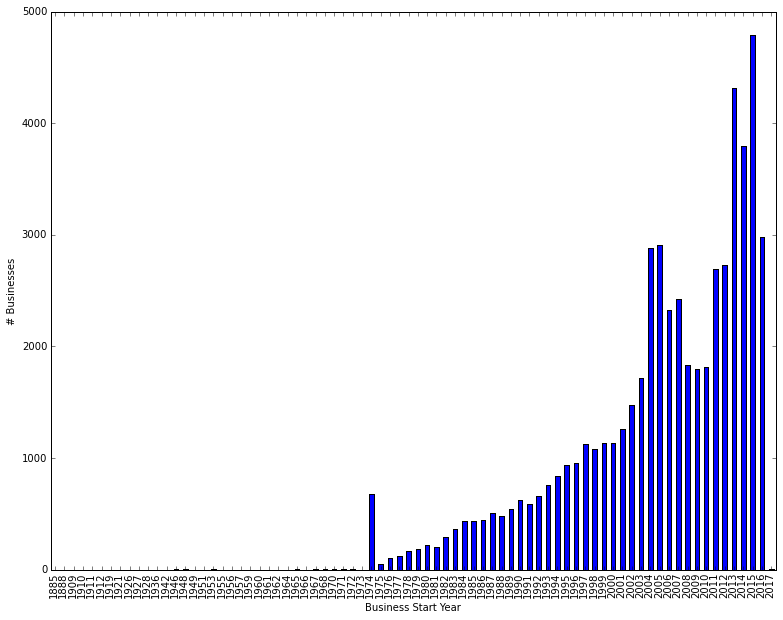

In [15]:
plt.figure(figsize=(13, 10))
bus.bus_start_dt.groupby(bus.bus_start_dt.dt.year).count().plot(kind="bar")
plt.xlabel('Business Start Year')
plt.ylabel('# Businesses')

In [16]:
# import datetime stuff
from datetime import datetime
# print number of days business has been open through beginning of Insight 
print (datetime.strptime("2016-09-06", "%Y-%m-%d")-max(bus.creation_dt)).days
print (datetime.strptime("2016-09-06", "%Y-%m-%d")-min(bus.creation_dt)).days

61
15408


In [17]:
# start census geocode
from censusgeocode import CensusGeocode
cg = CensusGeocode()

In [29]:
# start file to hold business data
###f = open('data_final/sd_active_businesses_cleaned.csv', 'w')
f = open('data_final/sd_active_businesses_cleaned2.csv', 'w')
# print header
f.write('account_key,doing_bus_as_name,days_since_creation,naics_code,naics_code_simple,census_tract\n')
f.close()
# start file to hold addresses we couldn't find in the census
###g = open('data/sd_bad_business_addresses.csv', 'w')
g = open('data/sd_bad_business_addresses2.csv', 'w')
g.write('account_key,doing_bus_as_name,days_since_creation,naics_code,naics_code_simple,address_str\n')
g.close()

In [30]:
###f = open('data_final/sd_active_businesses_cleaned.csv', 'a')
###g = open('data/sd_bad_business_addresses.csv', 'a')
###f = open('data_final/sd_active_businesses_cleaned2.csv', 'a')
###g = open('data/sd_bad_business_addresses2.csv', 'a')

# start where I killed it last time
spot = bus[bus.account_key==2006005922].index[0]
#print spot

# go through each business
for row in bus.loc[spot:].itertuples():
    # try to get census tract for all businesses
    address = row[5]
    address = address.replace("01ST","1ST")
    address = address.replace("02ND","2ND")
    address = address.replace("03RD","3RD")
    address = address.replace("04TH","4TH")
    address = address.replace("05TH","5TH")
    address = address.replace("06TH","6TH")
    address = address.replace("07TH","7TH")
    address = address.replace("08TH","8TH")
    address = address.replace("09TH","9TH")
    
    # try to look up address (assuming they included city in address), at most 5 times
    n_attempts = 0
    address_info = []
    while True:
        try:
            n_attempts += 1
            address_info = cg.onelineaddress(address+', San Diego, CA')
            break
        except:
            if n_attempts >= 5:
                print 'bad in try1 '+address
                break

    # see if we got a result
    if len(address_info) != 0:
        # get census tract
        try:
            tract = str(address_info[0]['geographies']['Census Tracts'][0]['TRACT'])
        except:
            tract = '-1'
    else:
        tract = '-1'
    if tract == '-1':
        print tract+' '+address
    if row[0]%100 == 0:
        print row[0]
        f.close()
        g.close()
        ###f = open('data_final/sd_active_businesses_cleaned.csv', 'a')
        ###g = open('data/sd_bad_business_addresses.csv', 'a')
        ###f = open('data_final/sd_active_businesses_cleaned2.csv', 'a')
        ###g = open('data/sd_bad_business_addresses2.csv', 'a')


    # calculate number of days business has been open through beginning of Insight 
    days_open = (datetime.strptime("2016-09-06", "%Y-%m-%d")-(row[13])).days
        
    if tract!='-1':
        f.write(str(row[1])+','+row[2].replace(',',' ')+','+str(days_open)+','+str(row[16])+','+str(row[18])+','+tract+'\n')
    else:
        g.write(str(row[1])+','+row[2].replace(',',' ')+','+str(days_open)+','+str(row[16])+','+str(row[18])+','+address+'\n')
f.close()
g.close()

41525
-1 4370 LA JOLLA VILLAGE DR
-1 5030 CAMINO DE LA SIESTA
-1 7267 CAMINO DEGRAZIA
41600
-1 10606 CAMINO RUIZ
-1 12395 EL CAMINO REAL
-1 2801 CAMINO DEL RIO SOUTH
-1 17924 ALVA RD
-1 10606 CAMINO RUIZ
41700
-1 2815 CAMINO DEL RIO SOUTH
-1 6838 ARVERNE CT
-1 16629 DOVE CANYON RD
-1 4765 CARMEL MOUNTAIN RD
-1 4660 LA JOLLA VILLAGE DR
-1 2851 CAMINO DEL RIO SOUTH
-1 2810 CAMINO DEL RIO SOUTH
-1 5110 CLMNT MSA BLVD
41800
-1 18094 CHIEFTAIN CT
-1 411 CAMINO DEL RIO SOUTH
-1 11295 CAMINO RUIZ
-1 12363 CAMINITO VIBRANTE
-1 11161 CAMINITO ALVAREZ
-1 8280 TORERO PL
-1 9524 KEARNY VILLA RD
-1 8380 CAMINO SANTA FE
-1 1011 CAMINO DEL RIO SOUTH
-1 4262 CAMINO DEL RIO NORTH
-1 4370 LA JOLLA VILLAGE DR
-1 1351 DISTRIBUTION WAY
-1 15652 CAMINITO LA TORRE
-1 7565 TUPELO CV
-1 17300 RED HILL AVE
42000
-1 2835 CAMINO DEL RIO SOUTH
-1 3844 CAMINITO AGUILAR
-1 2801 CAMINO DEL RIO SOUTH
-1 4524 CAMINITO PEDERNAL
-1 2835 CAMINO DEL RIO SOUTH
-1 13369 TIVERTON RD
-1 5487 EL ONTONO WAY
-1 10606 CAMINO RUIZ


In [75]:
# remove 176 w/ no addy
f = open('data_final/sd_active_businesses_cleaned_updated.csv', 'w')
info = pd.read_csv('data_final/sd_active_businesses_cleaned.csv',dtype={'account_key': str, 'census_tract': str})
info

,account_key,doing_bus_as_name,days_since_creation,naics_code,naics_code_simple,census_tract
0,2016008533,ARCHITECT ATHLETICS,61,42199,42,003212
1,2016008531,SILVER LINING STAGERS,61,54149,54,008335
2,2016008529,TAMKEEN INC,61,42299,42,008511
3,2016008525,REBECCA EICHTEN ART DESIGN,61,45311,45,000900
4,2016008524,COLD STONE CREAMERY 20837,61,72221,72,007905
5,2016008523,MOVEMENT MORTGAGE,61,52599,52,008901
6,2016008520,ASHLEY DUCHENE PHOTOGRAPHY,61,54192,54,007100
7,2016008517,GLOBAL LIMO SERVICE LLC,61,4853,48,002803
8,2016008516,STEPHANIE SULLIVAN,61,81,81,008346
9,2016008513,SAN DIEGO PROFESSIONAL GROUP PC,61,62199,62,003403


In [76]:
bad = bus.account_key[bus.address_str==''].to_string(index=False)
# print header
f.write('account_key,doing_bus_as_name,days_since_creation,naics_code,naics_code_simple,census_tract\n')
# go through each business
for row in info.itertuples():
    if row[1] not in bad:
        f.write(str(row[1])+','+row[2]+','+str(row[3])+','+str(row[4])+','+str(row[5])+','+str(row[6])+'\n')
f.close()